# Raster Clipping
AOI definition in vector-based raster clipping and user defined extent-based raster clipping are significantly different. While, vector-based clipping is straight forward, creating AOI based on user-defined extent is tricky since the extent has to be converted to the raster CRS. 
Hence, two different functions are created for each purpose. 

## 1. Vector-based Raster clipping


In [1]:
import rasterio as rio
import fiona
from rasterio.mask import mask
from rasterio.plot import show

vector = fiona.open('jcf_utm.shp')
raster = rio.open('LC08_L1TP_140043_20180109_20180119_01_T1/LC08_L1TP_140043_20180109_20180119_01_T1_B4.TIF')

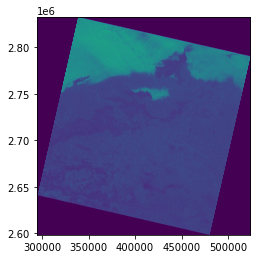

<AxesSubplot:>

In [2]:
show(raster)

In [3]:
def RasterClip_vector(ras = raster, vec = vector, boundaryCrop = True):
    # making AOI from external vector
    aoi = [feature["geometry"] for feature in vec]
    
    # applying mask 
    clipped, transform = mask(ras, aoi, crop=boundaryCrop)
    
    # use original metadata
    meta = ras.meta.copy()
    # update the metadata with clipped image metadata
    meta.update({"transform": transform,
                 "height":clipped.shape[1],
                 "width":clipped.shape[2]})
    with rio.open('clipped.tif', 'w', **meta) as dst:
        dst.write(clipped)
    return rio.open('clipped.tif')

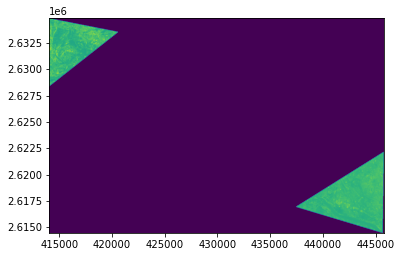

<AxesSubplot:>

In [4]:
vec_based = RasterClip_vector()
show(vec_based)

## 2. Extent-based Raster clipping

In [5]:
# FOR CLIPPING WITH USER-DEFINED EXTENT
import rasterio as rio
from shapely.geometry import box
import geopandas as gpd
from fiona.crs import from_epsg
from rasterio.mask import mask
from rasterio.plot import show

xmin, ymin, xmax, ymax = 86.1, 23.59, 86.5, 23.84
raster = rio.open('LC08_L1TP_140043_20180109_20180119_01_T1/LC08_L1TP_140043_20180109_20180119_01_T1_B4.TIF')

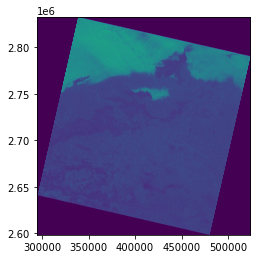

<AxesSubplot:>

In [6]:
show(raster)

In [7]:
def RasterClip_extent (ras = raster, xmin=xmin, ymin=ymin, xmax=xmax, ymax=ymax, boundaryCrop = True):
    
    bbox = box(xmin, ymin, xmax, ymax)
    coords = gpd.GeoDataFrame({'geometry': bbox}, index=[0], crs=from_epsg(4326))
    coords = coords.to_crs(crs=raster.crs.data)
    minx = coords.bounds['minx'].min()
    miny = coords.bounds['miny'].min()
    maxx = coords.bounds['maxx'].min()
    maxy = coords.bounds['maxy'].min()

    aoi = [{'type': 'Polygon',
                   'coordinates': [[(minx,miny),
                                    (minx,maxy),
                                    (maxx,maxy),
                                    (maxx,miny),
                                    (minx,miny)]]}]
    
    # applying mask 
    clipped, transform = mask(ras, aoi, crop=boundaryCrop)
    
    # use original metadata
    meta = ras.meta.copy()
    # update the metadata with clipped image metadata
    meta.update({"transform": transform,
                 "height":clipped.shape[1],
                 "width":clipped.shape[2]})
    with rio.open('clipped.tif', 'w', **meta) as dst:
        dst.write(clipped)
    return rio.open('clipped.tif')

C:\Users\Xplorer\miniconda3\envs\gis\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


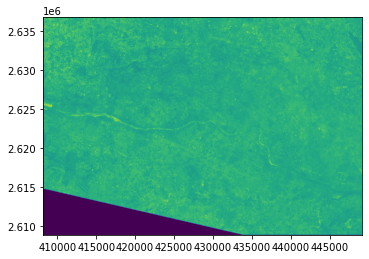

<AxesSubplot:>

In [8]:
ext_based = RasterClip_extent()
show(ext_based)